In [64]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.cross_validation import train_test_split,cross_val_score,ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.rename(columns={'Customer name': 'CustomerName', 'Company category': 'CompanyCategory','Annual salary':'AnnualSalary','Can buy paid?':'CanBuyPaid?' }, inplace=True)

In [4]:
data['CanBuyPaid?'] = data['CanBuyPaid?'].replace(to_replace = {'Yes':1,'No':0})

In [5]:
number = LabelEncoder()
data['CustomerName'] = number.fit_transform(data.CustomerName)
data['Occupation'] = number.fit_transform(data.Occupation)
data['CompanyCategory'] = number.fit_transform(data.CompanyCategory)

In [6]:
train, test = train_test_split(data, train_size=0.7,random_state=42)

In [7]:
train_X = train.ix[:,:-1]
train_Y = train.ix[:,-1:]
test_X = test.ix[:,:-1]
test_Y = test.ix[:,-1:]

In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()


In [9]:
regressor.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

('Weight coefficients: ', array([[ -6.36064825e-03,  -4.14973963e-03,   1.03833854e-02,
          8.37297742e-02,   4.29574962e-10]]))
('y-axis intercept: ', array([ 0.54944046]))


In [11]:
preds = regressor.predict(test_X)

In [12]:
predictions = [round(value) for value in preds]

In [13]:
accuracy = accuracy_score(test_Y, predictions)

In [14]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.00%


In [15]:
#RMSE
from sklearn import metrics
print np.sqrt(metrics.mean_squared_error(test_Y, preds))

0.456179544644


In [16]:
print(metrics.mean_absolute_error(test_Y, preds))
print(metrics.mean_squared_error(test_Y, preds))

0.389421635669
0.208099776952


## Accuracy on Train Data

In [17]:
y_pred_train = regressor.predict(train_X)
predictions = [round(value) for value in y_pred_train]
accuracy = accuracy_score(train_Y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.43%


## SVM

In [18]:
# Support Vector Machines
svc = SVC(gamma=10)
svc.fit(train_X, train_Y)
Y_pred = svc.predict(test_X)
svc.score(train_X, train_Y)

/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [19]:
#cross_val_score(SVC(C=10), train_X,train_Y, cv=3, scoring="f1")

In [20]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [21]:
rfrModel = RandomForestRegressor()
rfrModel.fit(train_X,train_Y)
preds = rfrModel.predict(test_X)
predictions = [round(value) for value in preds]
accuracy = accuracy_score(test_Y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.33%


/home/chetan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


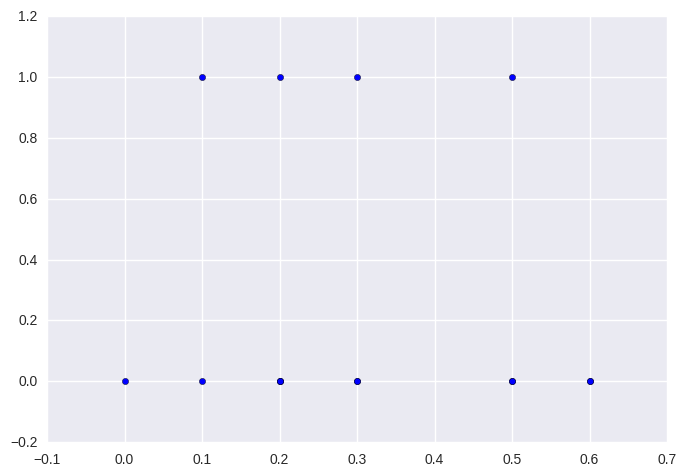

In [22]:
plt.scatter(preds, test_Y)

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
# Metric 1: correlation coefficient.
r2_score(preds, test_Y) 

-6.3036649214659688

In [24]:
# Metric 2: mean squared error
mean_squared_error(preds, test_Y)

0.24799999999999997

In [25]:
cv = ShuffleSplit(n=len(train_X), n_iter=15, test_size=0.3)

In [26]:
models = dict()
models['rf'] = RandomForestRegressor()
models['gb'] = GradientBoostingRegressor()
models['ad'] = AdaBoostRegressor()
models['ex'] = ExtraTreesRegressor()
scores = dict()

for abbr, model in models.items():
    print(abbr, model)
    score = cross_val_score(model, train_X, train_Y, cv=cv, scoring='mean_squared_error')
    scores[abbr] = -score

('ex', ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False))


/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:1665: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.

('rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))


/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/hom

('gb', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False))


/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


('ad', AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None))


/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/hom

In [27]:
score = dict()
for algo, score_value in scores.iteritems():
    print algo,accuracy_score(test_Y, [round(value) for value in score_value])

ad 0.666666666667
rf 0.733333333333
ex 0.666666666667
gb 0.666666666667


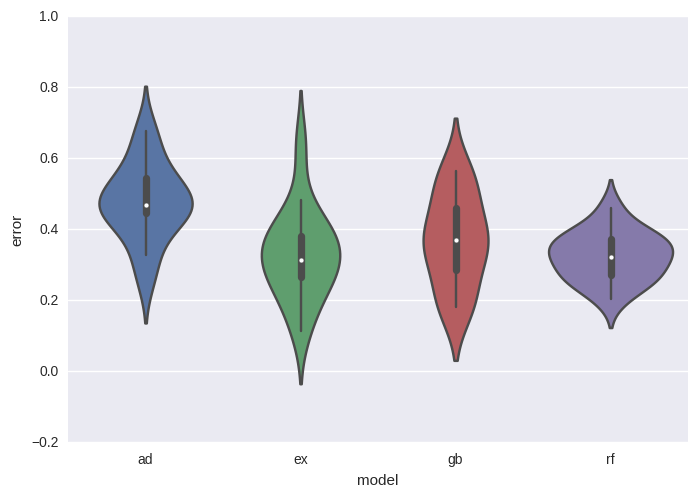

In [28]:
score_summary = pd.DataFrame(scores)
score_summary = pd.DataFrame(score_summary.unstack()).reset_index()
# sns.violinplot(x=)
score_summary.columns = ['model', 'idx', 'error']
sns.violinplot(x='model', y='error', data=score_summary)

In [29]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(train_X, train_Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [30]:
x_knr_pred = kneighbor_regression.predict(train_X)
knr_predictions = [round(value) for value in x_knr_pred]

print("Accuracy: %.2f%%" % (accuracy_score(train_Y, knr_predictions) * 100.0))

Accuracy: 100.00%


In [31]:
y_pred_test = kneighbor_regression.predict(test_X)
y_knr_predictions = [round(value) for value in y_pred_test]

print("Accuracy: %.2f%%" % (accuracy_score(test_Y, y_knr_predictions) * 100.0))

Accuracy: 60.00%


In [32]:
from sklearn.linear_model import Ridge

In [33]:
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(train_X, train_Y)
    training_scores.append(ridge.score(train_X, train_Y))
    test_scores.append(ridge.score(test_X, test_Y))
    ridge_models[alpha] = ridge
for train,test in zip(training_scores,test_scores):
    print train,test

0.0708517803506 -0.00540984941797
0.0837419604572 -0.0388888773424
0.08564940759 -0.0602875993609
0.0856852526793 -0.0641054022047


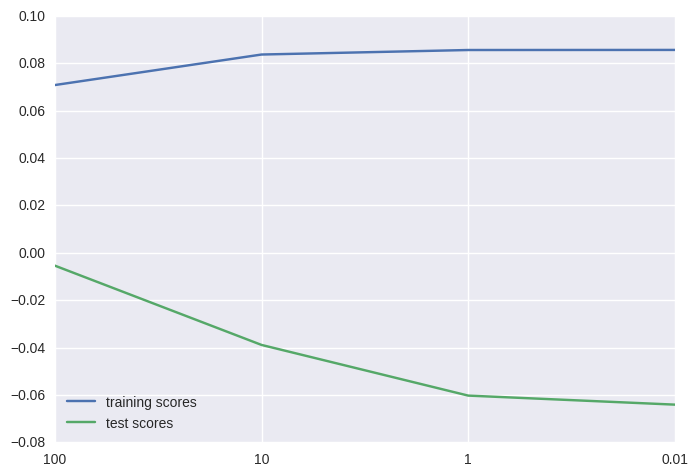

In [34]:
plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best")

In [35]:
ridgeRegModel = Ridge(alpha=.01).fit(train_X,train_Y)
ridgePred = ridgeRegModel.predict(test_X)
ridge_predictions = [round(value) for value in ridgePred]
print("Accuracy: %.2f%%" % (accuracy_score(test_Y, ridge_predictions) * 100.0))

Accuracy: 80.00%


In [36]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

/home/chetan/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


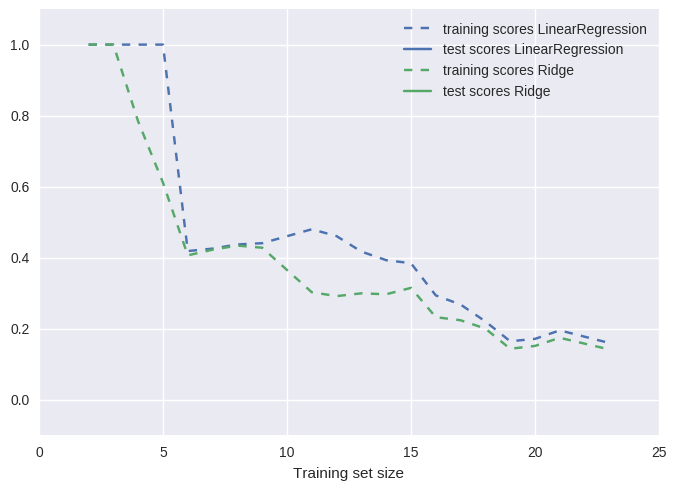

In [37]:
plt.figure()
plot_learning_curve(LinearRegression(), train_X, train_Y)
plot_learning_curve(Ridge(alpha=10), train_X, train_Y)

In [38]:
from sklearn.linear_model import Lasso

In [39]:
lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, .01]:
    lasso = Lasso(alpha=alpha).fit(train_X, train_Y)
    training_scores.append(lasso.score(train_X, train_Y))
    test_scores.append(lasso.score(test_X, test_Y))
    lasso_models[alpha] = lasso
for train,test in zip(training_scores,test_scores):
    print train,test

0.00168034413579 0.00729735198793
0.00168034466195 0.00730388946765
0.0162340507226 0.0250314839281
0.084939945255 -0.040922013627


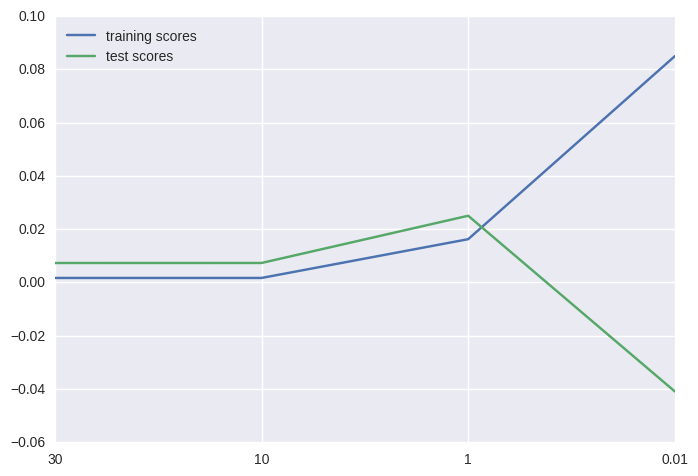

In [40]:
plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [30, 10, 1, .01])
plt.legend(loc="best")

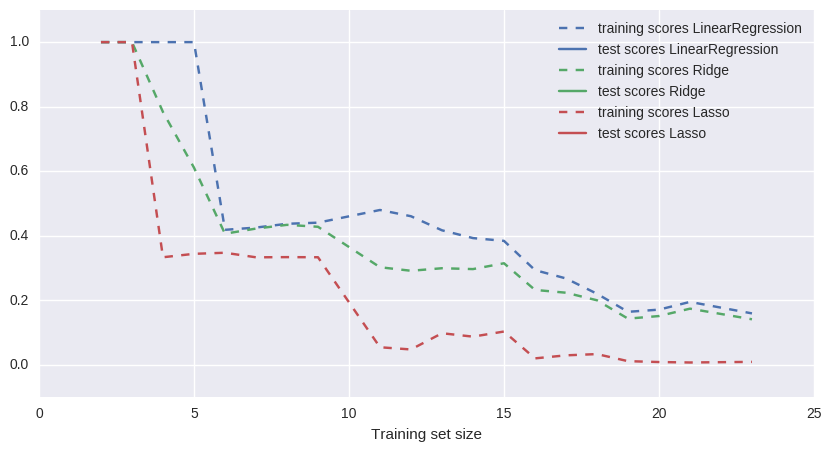

In [41]:
plt.figure(figsize=(10, 5))
plot_learning_curve(LinearRegression(), train_X, train_Y)
plot_learning_curve(Ridge(alpha=10), train_X, train_Y)
plot_learning_curve(Lasso(alpha=10), train_X, train_Y)

In [48]:
import xgboost as xgb

In [52]:
xgbmodel = xgb.XGBRegressor()
xgbmodel.fit(train_X,train_Y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [54]:
xgb_y_pred = xgbmodel.predict(test_X)
xgb_prediction = [round(value) for value in xgb_y_pred]

In [56]:
accuracy = accuracy_score(test_Y,xgb_prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.33%


In [61]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=7)

In [63]:
for train_index, test_index in kf.split(train_X):
    print train_index, test_index

AttributeError: 'KFold' object has no attribute 'split'

In [66]:
results = cross_val_score(xgbmodel, train_X, train_Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

TypeError: 'KFold' object is not iterable

In [65]:
rng = np.random.RandomState(31337)
kf = KFold(train_Y.shape[0], n_folds=2, shuffle=True, random_state=rng)
for train_index, test_index in kf:
    xgb_model = xgb.XGBRegressor().fit(train_X[train_index],train_Y[train_index])
    predictions = xgb_model.predict(test_X[test_index])
    print 'hello'

TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [ ]:
# train_X, test_X, train_y, test_y = train_test_split(train, test, 
#                                                     train_size=0.5, 
#                                                     random_state=123)